Episode 0
Player 0 0
Player 1 0
Player 2 0
Player 3 0
Episode 100
Player 0 86.0
Player 1 334.0
Player 2 581.0
Player 3 -1001.0
Episode 200
Player 0 462.0
Player 1 129.0
Player 2 -39.0
Player 3 -552.0
Episode 300
Player 0 -542.0
Player 1 -290.0
Player 2 913.0
Player 3 -81.0
Episode 400
Player 0 -1449.0
Player 1 -288.0
Player 2 1908.0
Player 3 -171.0
Episode 500
Player 0 -579.0
Player 1 -455.0
Player 2 1872.0
Player 3 -838.0
Episode 600
Player 0 -1310.0
Player 1 -552.0
Player 2 1807.0
Player 3 55.0
Episode 700
Player 0 -2268.0
Player 1 -762.0
Player 2 1752.0
Player 3 1278.0
Episode 800
Player 0 -1991.0
Player 1 -942.0
Player 2 1735.0
Player 3 1198.0
Episode 900
Player 0 -2110.0
Player 1 -1473.0
Player 2 2289.0
Player 3 1294.0
Episode 1000
Player 0 -2588.0
Player 1 -1955.0
Player 2 3570.0
Player 3 973.0
Episode 1100
Player 0 -2780.0
Player 1 -1125.0
Player 2 3191.0
Player 3 714.0
Episode 1200
Player 0 -2292.0
Player 1 -1121.0
Player 2 2016.0
Player 3 1397.0
Episode 1300
Player 0 -1463.0
P

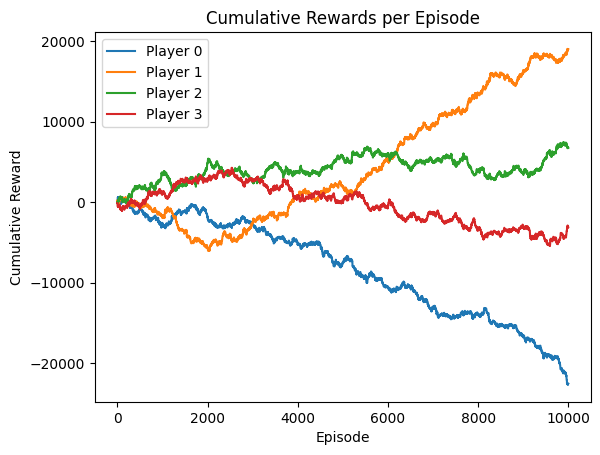

In [2]:
import matplotlib.pyplot as plt
from pyrmj import Game, RandomAgent, ShantenAgent, AIAgent, rule

game = Game(rule({
    "赤牌": {"m": 0, "p": 0, "s": 0},
    "場数":0,
    "連荘方式": 0,
    "トビ終了あり": False,
    "延長戦方式": 0,
    "一局戦連荘なし": True
}))

agents = [RandomAgent(), AIAgent(), RandomAgent(), RandomAgent()]
episode_points = {player_id: [] for player_id in range(4)}
episode_num = 10000

for episode in range(episode_num):
    if episode % 100 == 0:
        print(f'Episode {episode}')
        print(f'Player 0 {sum(episode_points[0])}')
        print(f'Player 1 {sum(episode_points[1])}')
        print(f'Player 2 {sum(episode_points[2])}')
        print(f'Player 3 {sum(episode_points[3])}')

    if episode_num - 6 < episode < episode_num:
        observation = game.reset(chiicha=episode % 4, save_flag=True)

    else:
        observation = game.reset(chiicha=episode % 4, save_flag=False)

    while not game.done():
        actions = {
            player_id: agents[player_id].action(obs)
            for player_id, obs in observation.items()
        }
        observation = game.step(actions)

    rewards = game.reward()
    points = game.point()
    # print(rewards)

    # print(rewards)
    # print(points)

    agents[1].update(rewards[1])

    for player_id, point in points.items():
        episode_points[player_id].append(point)

cumulative_points = {player_id: [] for player_id in range(4)}

for player_id in range(4):
    total = 0

    for point in episode_points[player_id]:
        total += point
        cumulative_points[player_id].append(total)

for player_id, points in cumulative_points.items():
    plt.plot(points, label=f'Player {player_id}')

plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards per Episode')
plt.legend()
plt.show()

Episode 0
Player 0 0
Player 1 0
Player 2 0
Player 3 0
Episode 100
Player 0 2.0
Player 1 171.0
Player 2 -361.0
Player 3 188.0
Episode 200
Player 0 -91.0
Player 1 281.0
Player 2 -382.0
Player 3 192.0
Episode 300
Player 0 -975.0
Player 1 1364.0
Player 2 -387.0
Player 3 -2.0
Episode 400
Player 0 -1256.0
Player 1 2106.0
Player 2 -1202.0
Player 3 352.0
Episode 500
Player 0 -1605.0
Player 1 1893.0
Player 2 -1940.0
Player 3 1652.0
Episode 600
Player 0 -1069.0
Player 1 1458.0
Player 2 -2676.0
Player 3 2287.0
Episode 700
Player 0 -1103.0
Player 1 615.0
Player 2 -2395.0
Player 3 2883.0
Episode 800
Player 0 -2506.0
Player 1 913.0
Player 2 -1643.0
Player 3 3236.0
Episode 900
Player 0 -2212.0
Player 1 418.0
Player 2 -977.0
Player 3 2771.0
Episode 1000
Player 0 -2530.0
Player 1 710.0
Player 2 -1438.0
Player 3 3258.0
Episode 1100
Player 0 -2471.0
Player 1 2041.0
Player 2 -1778.0
Player 3 2208.0
Episode 1200
Player 0 -2685.0
Player 1 2821.0
Player 2 -1868.0
Player 3 1732.0
Episode 1300
Player 0 -2408.0

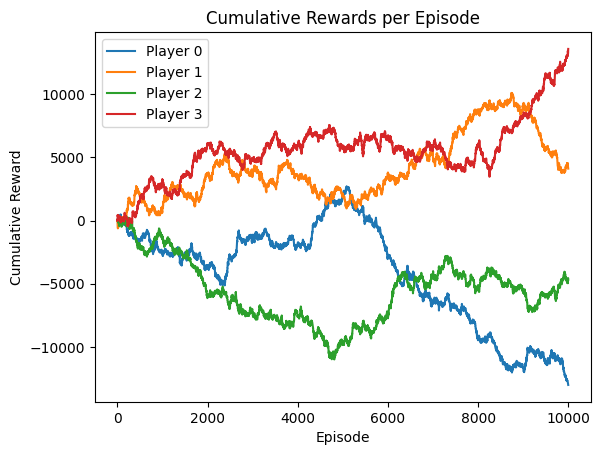

In [4]:
import matplotlib.pyplot as plt
from pyrmj import Game, RandomAgent, ShantenAgent, AIAgent, rule

game = Game(rule({
    "赤牌": {"m": 0, "p": 0, "s": 0},
    "場数":0,
    "連荘方式": 0,
    "トビ終了あり": False,
    "延長戦方式": 0,
    "一局戦連荘なし": True
}))

agents = [AIAgent(), RandomAgent(), RandomAgent(), RandomAgent()]
episode_points = {player_id: [] for player_id in range(4)}
episode_num = 10000

for episode in range(episode_num):
    if episode % 100 == 0:
        print(f'Episode {episode}')
        print(f'Player 0 {sum(episode_points[0])}')
        print(f'Player 1 {sum(episode_points[1])}')
        print(f'Player 2 {sum(episode_points[2])}')
        print(f'Player 3 {sum(episode_points[3])}')

    if episode_num - 6 < episode < episode_num:
        observation = game.reset(chiicha=episode % 4, save_flag=True)

    else:
        observation = game.reset(chiicha=episode % 4, save_flag=False)

    while not game.done():
        actions = {
            player_id: agents[player_id].action(obs)
            for player_id, obs in observation.items()
        }
        observation = game.step(actions)

    rewards = game.reward()
    points = game.point()
    # print(rewards)

    # print(rewards)
    # print(points)

    agents[0].update(rewards[0])

    for player_id, point in points.items():
        episode_points[player_id].append(point)

cumulative_points = {player_id: [] for player_id in range(4)}

for player_id in range(4):
    total = 0

    for point in episode_points[player_id]:
        total += point
        cumulative_points[player_id].append(total)

for player_id, points in cumulative_points.items():
    plt.plot(points, label=f'Player {player_id}')

plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards per Episode')
plt.legend()
plt.show()